In [1]:
import sys
import os
sys.path.append("../../src")
sys.path.append("../../data")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython import display
import pylab as pl

from CorInfoMaxBSS import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Nonnegative_Antisparse_Copula'

# np.random.seed(250)

In [2]:
image_paths = '../../data/TestImages'
images = []
for im_dir in os.listdir(image_paths):
    try:
        images.append(mpimg.imread(os.path.join(image_paths,im_dir)))
    except:
        pass
images = np.array(images)

In [3]:
small_images = np.zeros((images.shape[0],324* 432* 3))
small_to_large_image_size_ratio = 0.1
for i in range(images.shape[0]):
    small_img = cv2.resize(images[i], # original image
                           (0,0), # set fx and fy, not the final size
                           fx=small_to_large_image_size_ratio, 
                           fy=small_to_large_image_size_ratio, 
                           interpolation=cv2.INTER_NEAREST)
    if small_img.shape[0] == 302:
        small_img = cv2.resize(small_img, (0,0), fx = 432/403, fy = 324/302)
    print(small_img.shape)
    small_images[i] = small_img.reshape(-1,)/255

small_images.shape

(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)
(324, 432, 3)


(14, 419904)

<IPython.core.display.Math object>

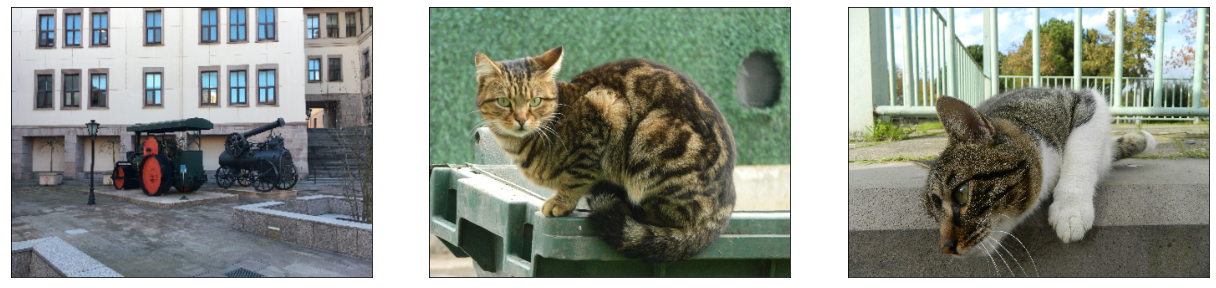

In [83]:
S = small_images[[12,6,3]]
Subplot_RGB_images(S, imsize = [324,432], height = 4, width = 18)
display_matrix(np.corrcoef(S))
# plt.savefig('Original_Images.pdf', format = 'pdf', dpi = 1500)

# S = small_images[[0,2,3]]
# Subplot_RGB_images(S, imsize = [324,432], height = 4, width = 18)
# display_matrix(np.corrcoef(S))
# plt.savefig('Original_Images.pdf', format = 'pdf', dpi = 1500)

In [102]:
# # np.random.seed(1000)
# # NumberofMixtures = 6
# # NumberofSources = 3
# # # Generate Mxr random mixing from i.i.d N(0,1)
# # A = np.random.randn(NumberofMixtures,NumberofSources)#/1.3
# # # A = np.random.uniform(-0.5, 0.5, (NumberofMixtures,NumberofSources))
# # X = np.dot(A,S)

# # SNR = 40
# # X, NoisePart = addWGN(X, SNR, return_noise = True)

# # SNRinp = 10 * np.log10(np.sum(np.mean((X - NoisePart)**2, axis = 1)) / np.sum(np.mean(NoisePart**2, axis = 1)))
# # print("The following is the mixture matrix A")
# # display_matrix(A)
# # print("Input SNR is : {}".format(SNRinp))

# # X_ = ZeroOneNormalizeColumns(X.T).T # For image plotting of mixtures

# # np.random.seed(50)
# NumberofMixtures = 5
# NumberofSources = 3
# # S_ = 2 * S - 1
# INPUT_STD = 0.28
# A = np.random.standard_normal(size=(NumberofMixtures,NumberofSources))
# # A = np.random.uniform(size=(NumberofMixtures,NumberofSources))
# X = A @ S
# X1 = X.copy()
# for M in range(A.shape[0]):
#     stdx = np.std(X[M,:])
#     A[M,:] = A[M,:]/stdx * INPUT_STD
    
# SNR=40
# # A = np.abs(A)
# Xn = A @ S
# X, NoisePart = addWGN(Xn, SNR, return_noise = True)

# SNRinp = 10 * np.log10(np.sum(np.mean((X - NoisePart)**2, axis = 1)) / np.sum(np.mean(NoisePart**2, axis = 1)))
# print("The following is the mixture matrix A")
# display_matrix(A)
# print("Input SNR is : {}".format(SNRinp))

# X_ = ZeroOneNormalizeColumns(X.T).T
# print('The following is the mixture matrix')
# display_matrix(A)

np.random.seed(650)
NumberofMixtures = 5
NumberofSources = 3

INPUT_STD = 0.28

A, X = WSM_Mixing_Scenario(S, NumberofMixtures, INPUT_STD)
A = np.random.randn(NumberofMixtures,NumberofSources)#/1.3
# np.random.seed(100)

# A = np.random.standard_normal((NumberofMixtures, NumberofSources))
# minA = np.min(A)
# min_abs = np.abs(minA)

# for i in range(NumberofMixtures):
#     for j in range(NumberofSources):
#         if A[i, j] <= 0:
#             A[i, j] += min_abs + 0.1
#         elif A[i, j] + minA >= 0:
#             A[i, j] += minA
        
X = np.dot(A,S)
SNR = 40

X, NoisePart = addWGN(X, SNR, return_noise=True)

SNRinp = 10 * np.log10(
    np.sum(np.mean((X - NoisePart) ** 2, axis=1))
    / np.sum(np.mean(NoisePart**2, axis=1))
)

X_ = ZeroOneNormalizeColumns(X.T).T
print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 40.00778694270494


In [103]:
X.std(1)

array([0.33866154, 0.20204187, 0.3987181 , 0.32736453, 0.48315098])

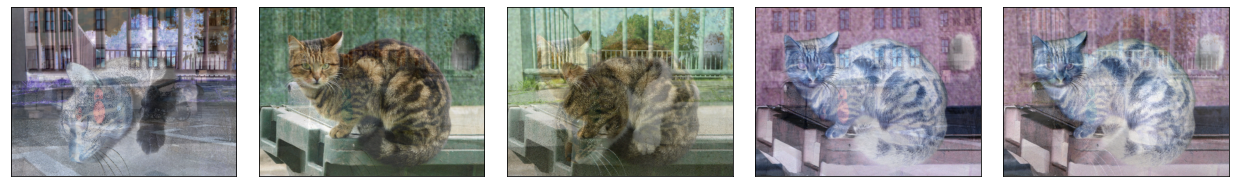

In [89]:
Subplot_RGB_images(X_, imsize = [324,432], height = 3, width = 18)
# plt.savefig('Mixture_Images.pdf', format = 'pdf', dpi = 1500)

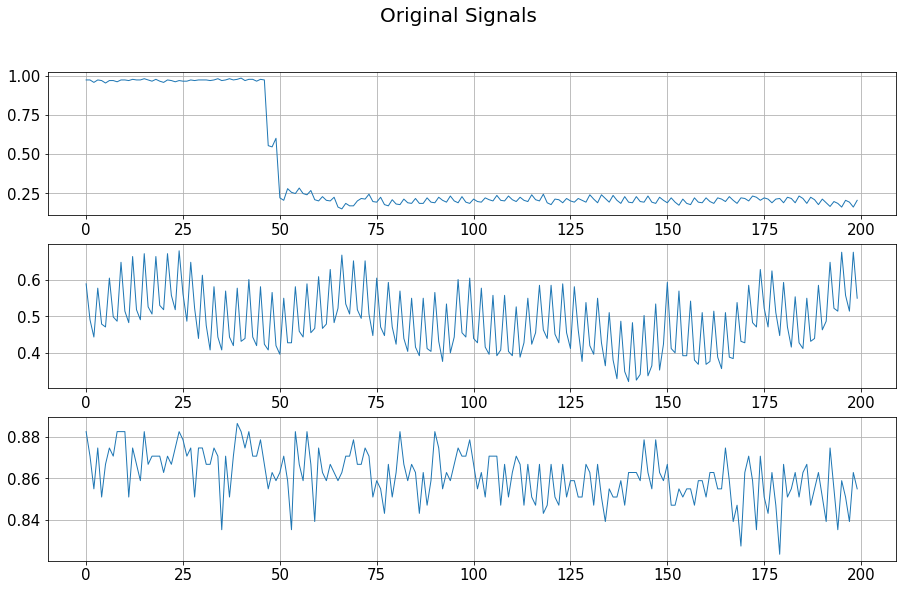

In [45]:
subplot_1D_signals(S[:,1000:1200], title = 'Original Signals', figsize = (15.2,9), colorcode = None)

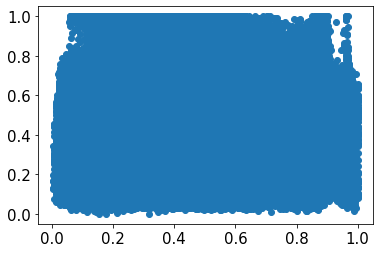

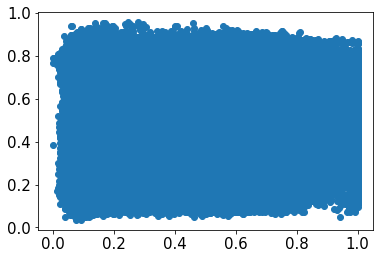

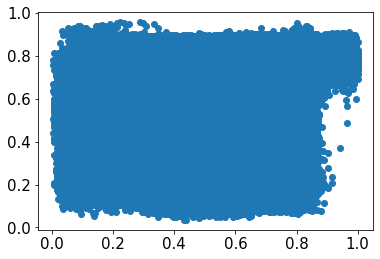

In [46]:
plt.figure()
plt.scatter(S[0,:], S[1,:])
plt.figure()
plt.scatter(S[1,:], S[2,:])
plt.figure()
plt.scatter(S[0,:], S[2,:])

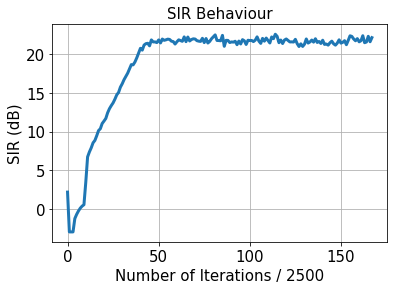

100%|██████████| 419904/419904 [01:49<00:00, 3829.35it/s]


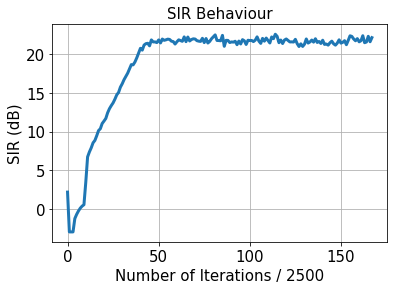

In [104]:
# # lambday = 1 - 1e-1/10
# # lambdae = 1 - 1e-1/10
# s_dim = S.shape[0]
# x_dim = X.shape[0]

# lambday = 1 - 1e-1/5
# lambdae = 0.3

# # Inverse output covariance
# By = 1 * np.eye(s_dim)
# # Inverse error covariance
# Be = 250 * np.eye(s_dim)

# debug_iteration_point = 25000
# model = OnlineCorInfoMax(s_dim = s_dim, x_dim = x_dim, muW =  100*1e-3, lambday = lambday,
#                          lambdae = lambdae, By = By, Be = Be, neural_OUTPUT_COMP_TOL = 1e-6,
#                          set_ground_truth = True, S = S, A = A)

lambday = 1 - 1e-1/5
lambdae = 0.5

s_dim = S.shape[0]
x_dim = X.shape[0]

n_samples = X.shape[1]
n_iter = n_samples
ppf = X.shape[1]
Wf_arr = []

# Inverse output covariance
By = 1 * np.eye(s_dim)
# Inverse error covariance
Be = 100 * np.eye(s_dim)

debug_iteration_point = 2500
model = CorInfoMaxVideoSeparation(  s_dim = s_dim, x_dim = x_dim, muW = 50*1e-3, lambday = lambday,
                                    lambdae = lambdae, By = By, Be = Be, neural_OUTPUT_COMP_TOL = 1e-6,
                                    set_ground_truth = True, S = S, A = A)

aa = model.seperate_videos(Wf_list = Wf_arr, n_pixel_per_frame = ppf, X = X.reshape(1,NumberofMixtures, -1), 
                           n_iter = n_iter, neural_dynamic_iterations = 500,
                           plot_in_jupyter = True, neural_lr_start = 0.5,
                           neural_lr_stop = 0.001, debug_iteration_point = debug_iteration_point, 
                           shuffle = True)

In [105]:
Wf = model.compute_overall_mapping(return_mapping = True)
Y = Wf @ X
Y_ = signed_and_permutation_corrected_sources(S,Y)
coef_ = ((Y_ * S).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr_jit(S, Y_)))

SINR = 10*np.log10(CalculateSINRjit(Y_, S, False)[0])

print("Overall SINR : {}".format(SINR))

Component SNR Values : [23.74596048  4.94202781 29.41104535]

Overall SINR : 13.845561985030312


In [106]:
CalculateSIR(A,Wf)

(22.16883373882347, 3)

In [107]:
display_matrix(Wf @A)

<IPython.core.display.Math object>

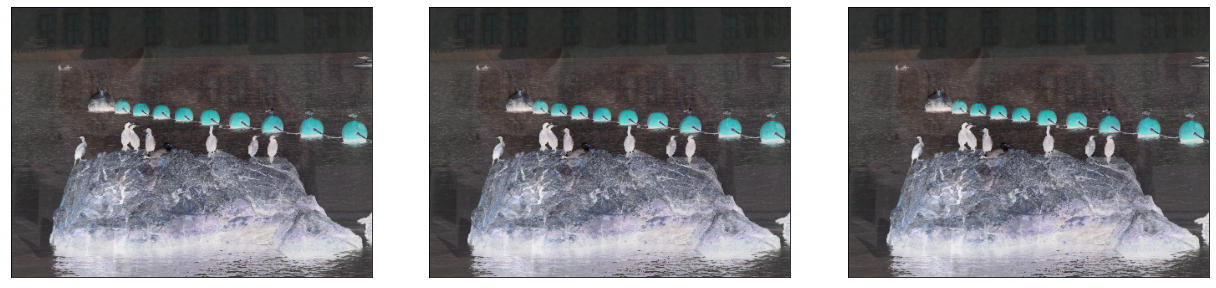

In [60]:
Subplot_RGB_images(ZeroOneNormalizeColumns(-Y_.T).T, imsize = [324,432], height = 4, width = 18)

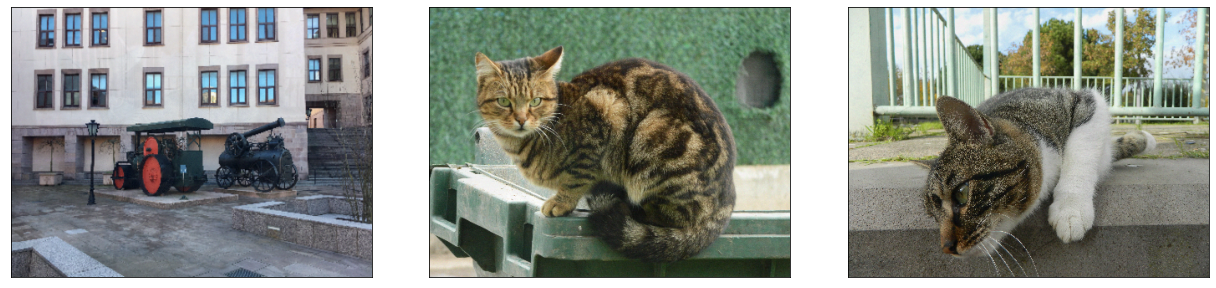

In [108]:
Subplot_RGB_images(ZeroOneNormalizeColumns(-Y.T).T, imsize = [324,432], height = 4, width = 18)

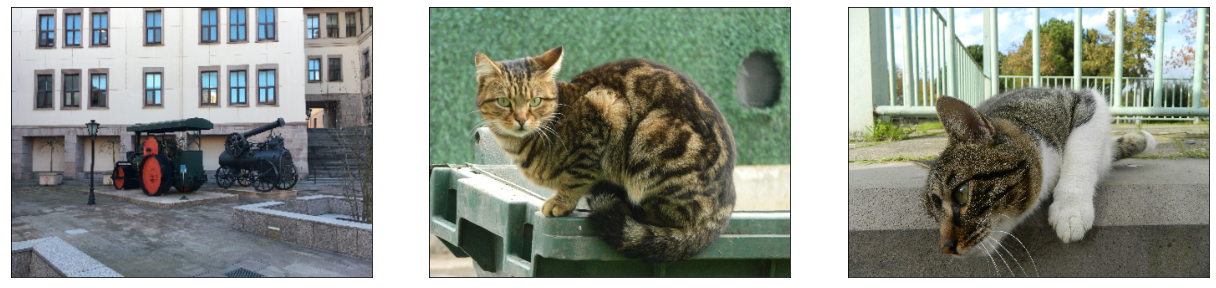

In [109]:
Subplot_RGB_images(S, imsize = [324,432], height = 4, width = 18)

In [110]:
snr(S, ZeroOneNormalizeColumns(-Y.T).T)

array([24.69847937, 23.0673243 , 26.49163879])

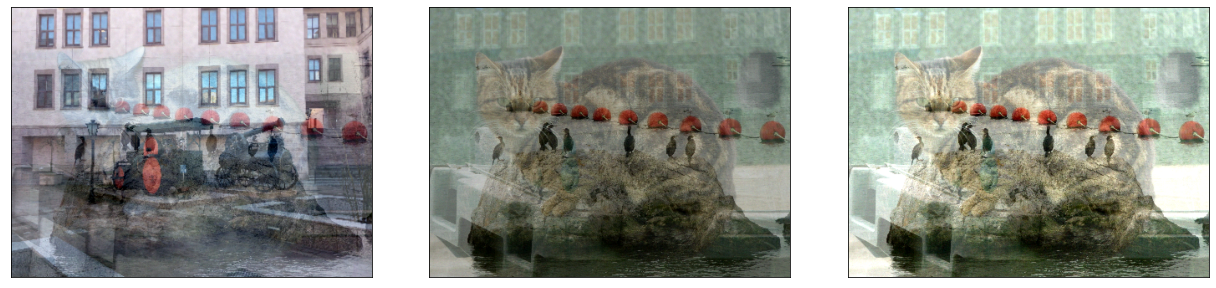

In [17]:
Subplot_RGB_images(np.clip(Y_, 0,1), imsize = [324,432], height = 4, width = 18)

In [20]:
np.linalg.svd(Wf @ A)

(array([[ 0.46798895, -0.87514777, -0.12289314],
        [ 0.61211705,  0.42130364, -0.66919053],
        [ 0.63741593,  0.23794879,  0.73285832]]),
 array([1.04311907, 0.90654907, 0.85495054]),
 array([[-0.72013989, -0.43290696, -0.54220854],
        [-0.67512882,  0.25700348,  0.69148412],
        [-0.15999881,  0.86402591, -0.47734642]]))

In [21]:
display_matrix(Wf @ A)

<IPython.core.display.Math object>